# WHAT THIS PROJECT DESCRIBES
1. Importation of required libraries
2. Describes basic information about the data
3. Exploratory Data Analysis.
Location of the neighbourhoods in the map
lowest host based on calculated host listings 
Top 5 neighbourhoods and areas based on calculated host listings
The cheapest neighbourhood
the cheapest area
the most purchased room type
The cheapest room type
average stay per room type
Average neighbourhood price in new york
Data source : kaggle.com/xyz_dataset




In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


imported the different functions needed

In [74]:
def my_function(x):
  return list(dict.fromkeys(x))


In [75]:
data = pd.read_csv("AB2_NYC_2019.CSV")

imported data set into jupyter notebook

In [76]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Checked the different data types in the data set

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

checked the overall information on the data set including the number of non blank enteries

In [78]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Checked the number of blank enteries in the data set

In [79]:
data.fillna({'reviews_per_month':0}, inplace=True)

Replaced the blank enteries with 0

In [80]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

checked again to verify changes have been made

In [82]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270    7/5/2019   
4  Entire home/apt     80              10                  9  11/19/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Viewed the first 5 enteries on the data set

In [85]:
data.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                0.0                               2   
48891         NaN                0.0                               2   
48892         NaN                0.0                               1   
48893         NaN                0.0                               6   
48894         NaN                0.0                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

Viewed the last 5 enteries on the data set

In [86]:
data.describe(include = ["O"])

name host_name neighbourhood_group neighbourhood  \
count            48879     48874               48895         48895   
unique           47896     11452                   5           221   
top     Hillside Hotel   Michael           Manhattan  Williamsburg   
freq                18       417               21661          3920   

              room_type last_review  
count             48895       38843  
unique                3        1764  
top     Entire home/apt   6/23/2019  
freq              25409        1413

checked the different unique enteries,the numbers of enteries for each colunm, the top entery,the frequency of the enteries

In [87]:
data1 = data.drop(columns = ["id","host_id","name", "last_review","host_name"])

Removed unnecessary columns

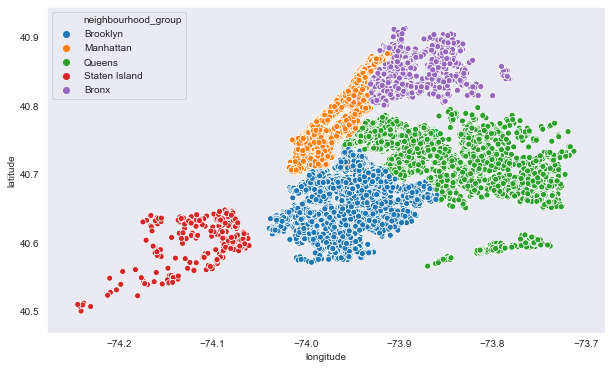

In [88]:
# Set size of Graph
plt.figure(figsize=(10,6))
# Draw Scatter Graph Plot
sns.scatterplot(data1.longitude,data1.latitude,hue=data1.neighbourhood_group)
# Show Plotted Graph
plt.ioff()

Plotted the longitude and latitude on a scatered graph to see the map view of the different neighbourhood groups in new york

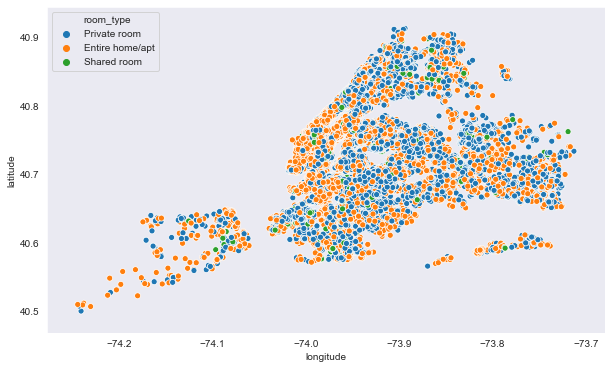

In [89]:
# Set size of Graph
plt.figure(figsize=(10,6))
# Draw Scatter Graph Plot
sns.scatterplot(data1.longitude,data1.latitude,hue=data1.room_type)
# Show Plotted Graph
plt.ioff()

Plotted the longitude and latitude on a scatered graph to see the map view of the different room types in new york

Text(0.5, 1, 'Heat Map Correlation Of New York BNB Data')

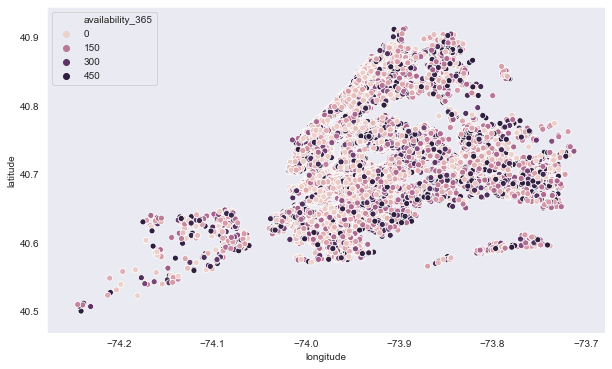

In [105]:
# Set size of Graph
plt.figure(figsize=(10,6))
# Draw Scatter Graph Plot 
sns.scatterplot(data1.longitude,data1.latitude,hue=data1.availability_365)
# Show Plotted Graph
plt.ioff()

Plotted the longitude and latitude on a scatered graph to see the map view of the location of the different availability of Air Bnbs in new york

In [91]:
data1.corr()


latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.084788  0.033939        0.024869   
longitude                       0.084788   1.000000 -0.150019       -0.062747   
price                           0.033939  -0.150019  1.000000        0.042799   
minimum_nights                  0.024869  -0.062747  0.042799        1.000000   
number_of_reviews              -0.015389   0.059094 -0.047954       -0.080116   
reviews_per_month              -0.018758   0.138516 -0.050564       -0.124905   
calculated_host_listings_count  0.019517  -0.114713  0.057472        0.127960   
availability_365               -0.010983   0.082731  0.081829        0.144303   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.015389          -0.018758   
longitude                                0.059094           0.138516   
price                                   -0.047954          -0.050564   
minimum_nights                          -0.080116          -0.124905   
number_of_reviews                        1.000000           0.589407   
reviews_per_month                        0.589407           1.000000   
calculated_host_listings_count          -0.072376          -0.047312   
availability_365                         0.172028           0.163732   

                                calculated_host_listings_count  \
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.047312   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
latitude                               -0.010983  
longitude                               0.082731  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
reviews_per_month                       0.163732  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

correlated the dtta set to find out the relationship between the different enteries

Text(0.5, 1, 'Heat Map Correlation Of New York BNB Data')

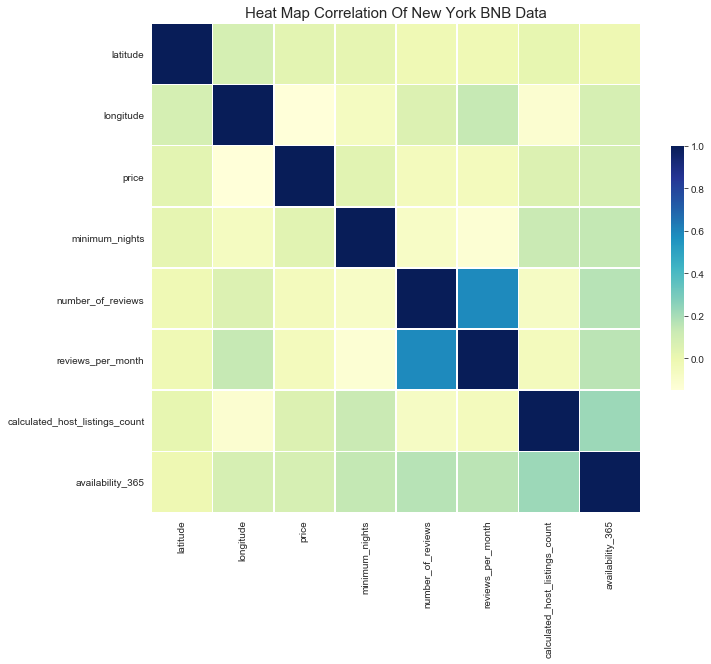

In [104]:
# Compute correlations
corr = data1.corr()

# Set background color / chart style
sns.set_style(style = 'dark')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw correlation plot
sns.heatmap(corr, cmap="YlGnBu", 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Set Title of Heat Map
ax.set_title("Heat Map Correlation Of New York BNB Data", fontsize = 15)

### Observation : From the plotted heat map, i observed that reviews per month and number of reviews have the most relationship with each other  

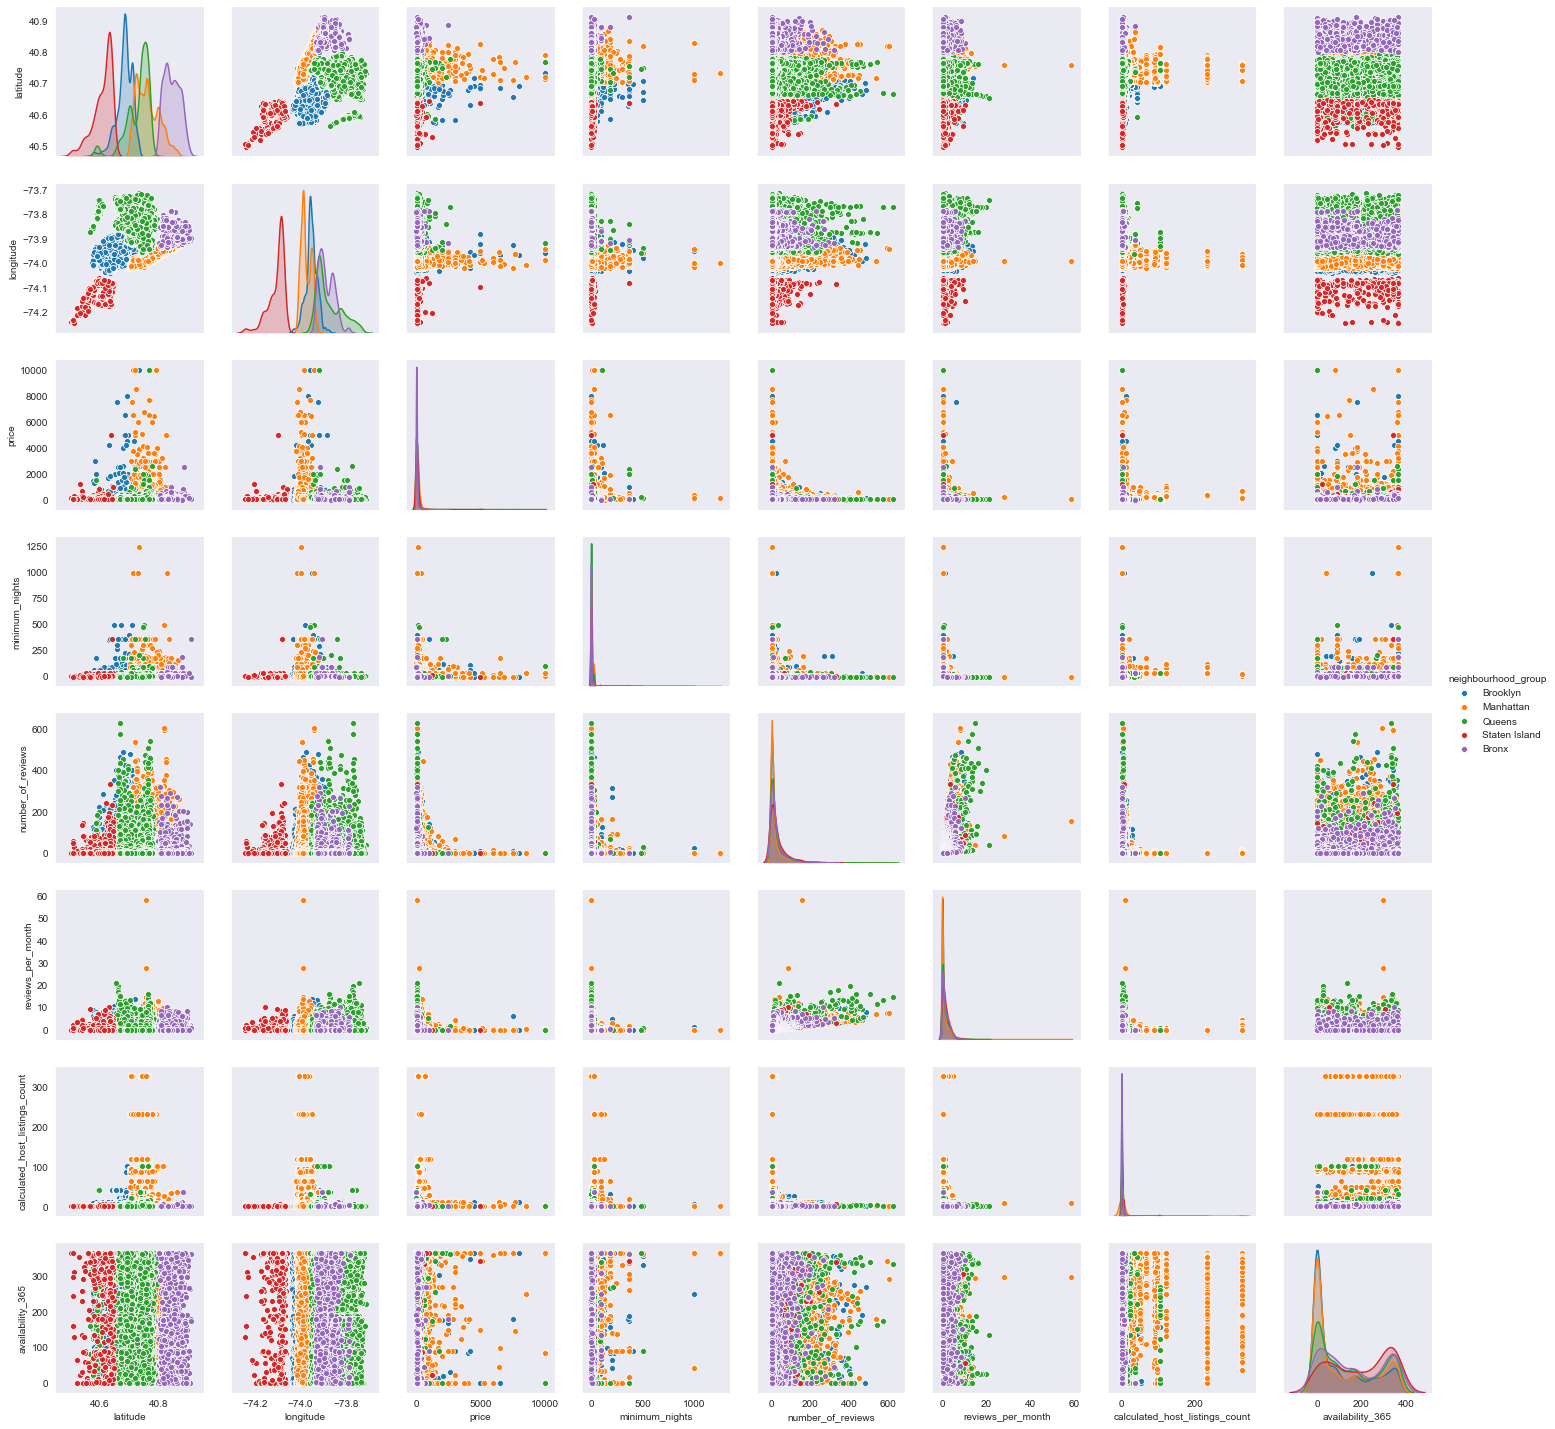

In [93]:
# Draw Pair plot
sns.pairplot(data1, hue='neighbourhood_group', height=2.5)
# Show pair plot
plt.show()

Plotted the enteries in a pair plot according to the different nieghbourhood groups  

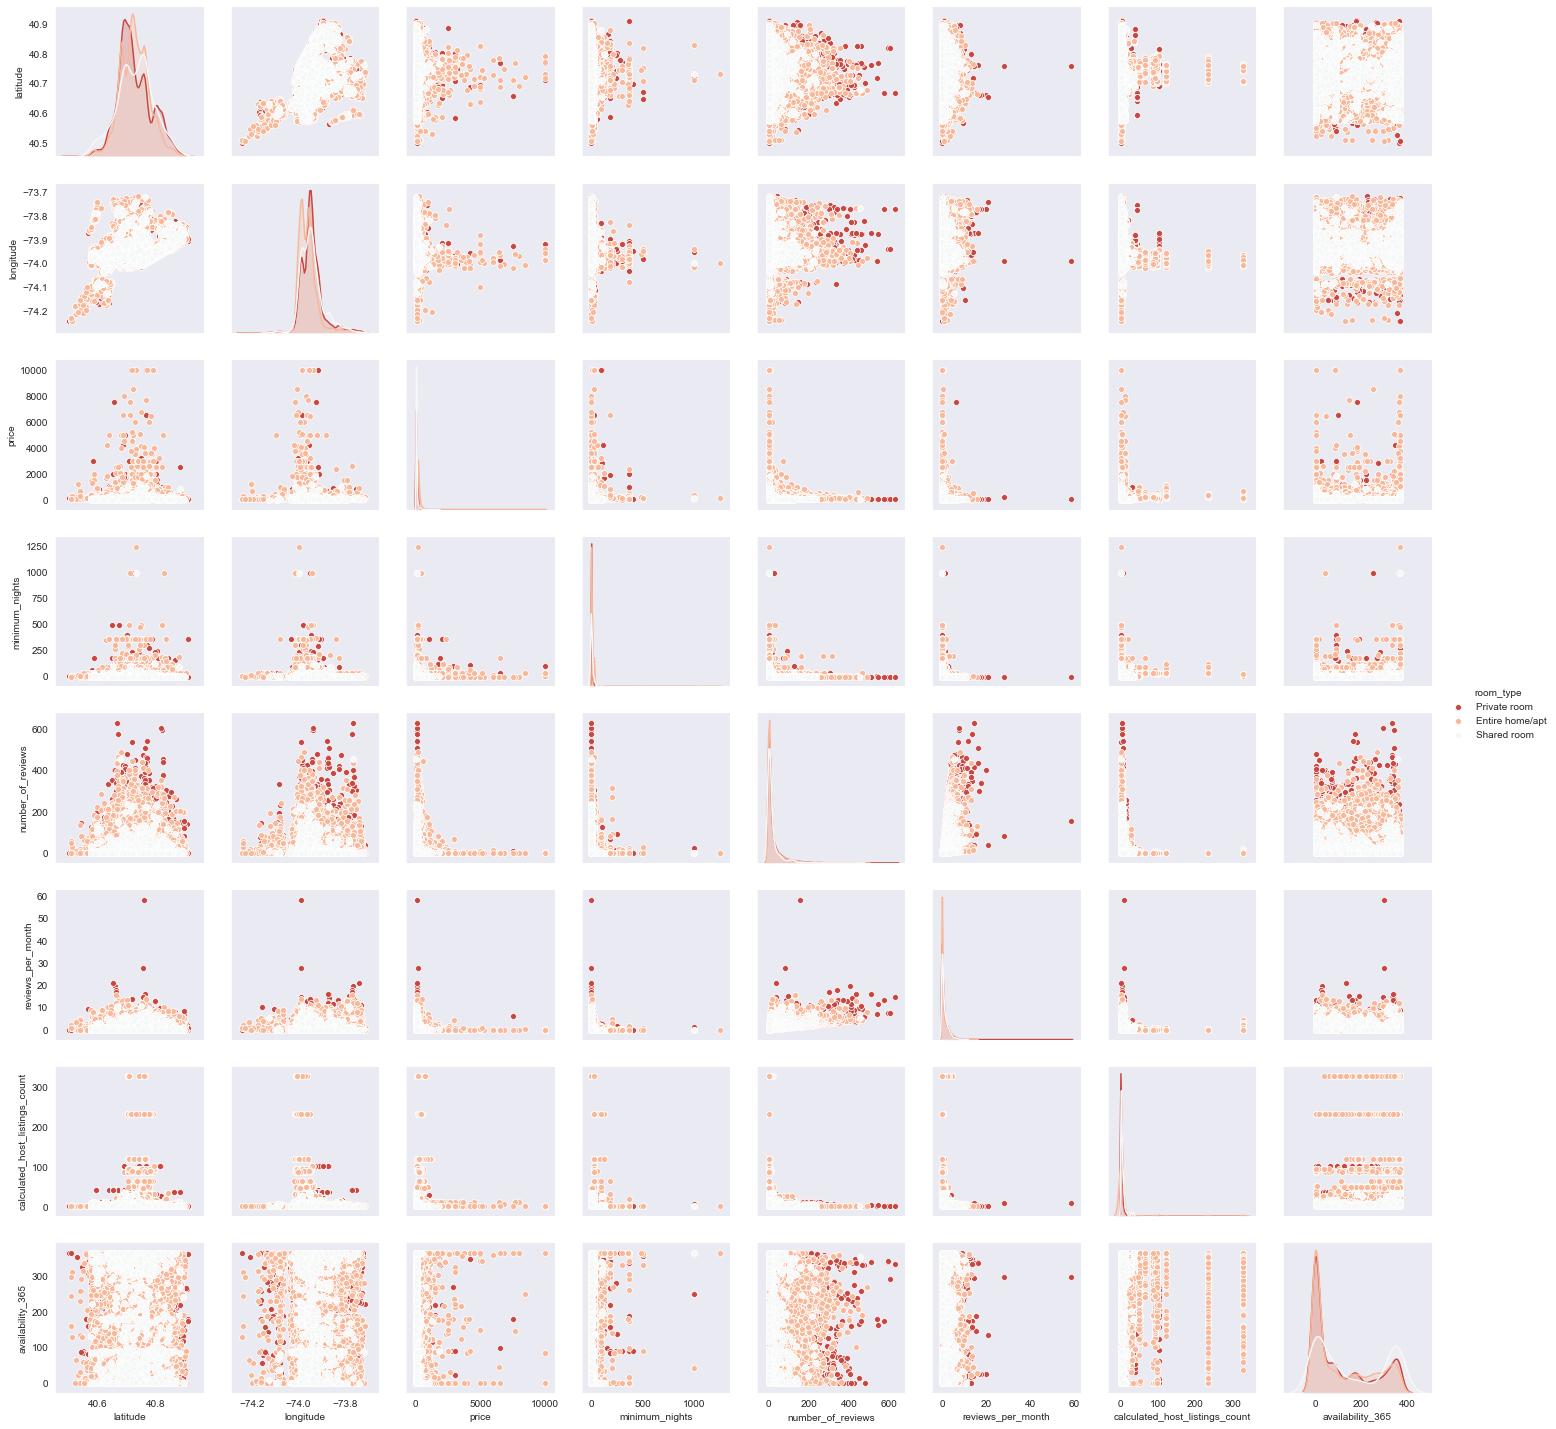

In [94]:
# Set color of the pair plot
color = sns.color_palette("RdBu",n_colors=5)
# Draw Pair plot
sns.pairplot(data1, hue='room_type',palette = color, height=2.5)
# Show pair plot
plt.show()

Plotted the enteries in a pair plot according to the different room types  

In [95]:
# Grouped the data set using neighbourhood group  
grouped_neighbourhood_group = data.groupby("neighbourhood_group")
# Calculated the mean of the calculated host listings and put them in a list
mean_calculated_host_listings_count = list(grouped_neighbourhood_group.mean()["calculated_host_listings_count"])
# Rounded up the values in the list to 1 decimal place
mean_calculated_host_listings_count = [round(i,1) for i in mean_calculated_host_listings_count ]
# Set nieghbourhood group as neighbourhood_Group
neighbourhood_Group = data.neighbourhood_group
# Then put it in a list
neighbourhood_Group = list(neighbourhood_Group)
# Delete Reoccuring values 
neighbourhood_Group = my_function(neighbourhood_Group)

neighbourhood_Group,mean_calculated_host_listings_count 

(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
 [2.2, 2.3, 12.8, 4.1, 2.3])

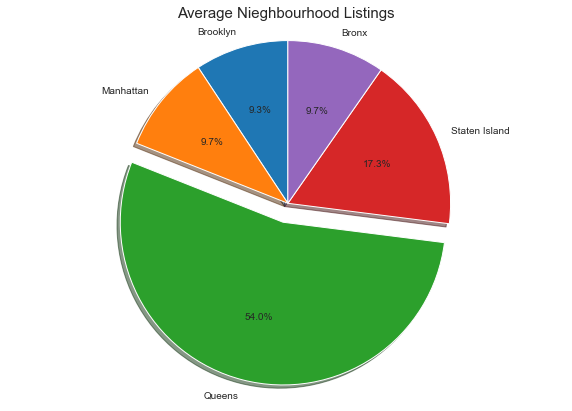

In [96]:
# Set variable mean of calculated host listings 
calculated_host_listings_count = mean_calculated_host_listings_count
# Bring out the #rd slice queens
explode = (0, 0, 0.12, 0, 0)
# Set up  matplotlib figure
fig1, ax = plt.subplots(figsize=(10,7))
# Draw Pie chart
ax.pie(calculated_host_listings_count ,labels=neighbourhood_Group, autopct='%1.1f%%',
        shadow=True, startangle=90,explode = explode)
# Set Title of Pie chart
ax.set_title('Average Nieghbourhood Listings', fontsize = 15)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
# Show pie chart
plt.show()

### Observation : From the pie chart, I observed that Queens has the highest average host listings in New york, meaning that it has the highest amount of buildings being used as an Air BNB in New York 

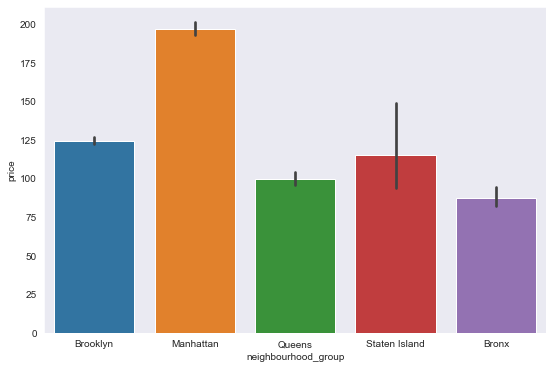

In [107]:
# Set size of Bar chart
plt.figure(figsize=(9,6))
# Draw Bar chart
sns.barplot(x="neighbourhood_group", y="price", data= data1)
# Show Bar chart
plt.show()

### Observation : From the bar chart, I notieced that Manhattan has the highest price of all the neighbourhoods, this could be due to security reasons, enviromental reasons or anyother reason 

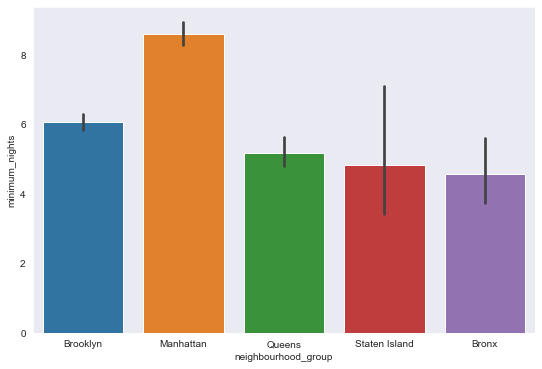

In [98]:
# Set size of Bar chart
plt.figure(figsize=(9,6))
# Draw Bar chart
sns.barplot(x="neighbourhood_group", y="minimum_nights", data= data1)
# Show Bar chart
plt.show()

### Observation 

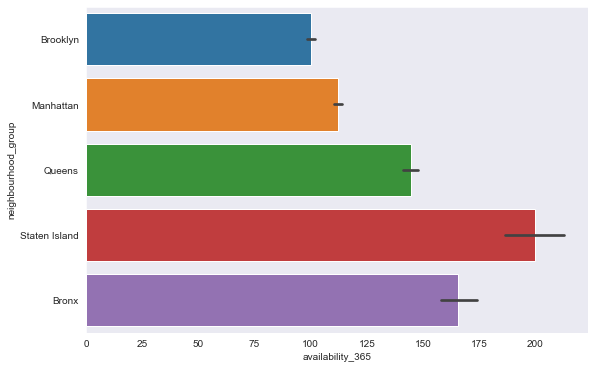

In [99]:
plt.figure(figsize=(9,6))
sns.barplot(x="availability_365", y="neighbourhood_group", data=data1)
plt.show()

In [109]:
nieghbourhood_group_count = data1.groupby(["neighbourhood_group"]).sort_values(by= data1.room_type.count(),ascending = False)

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [111]:
data1

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 45   
2         Private room    150               3                  0   
3      Entire home/apt     89               1                270   
4      Entire home/apt     80              10                  9   
...                ...    ...             ...                ...   
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                   0.00                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890               0.00                               2                 9  
48891               0.00                               2                36  
48892               0.00                               1                27  
48893               0.00                               6                 2  
48894               0.00                               1                23  

[48895 rows x 11 columns]

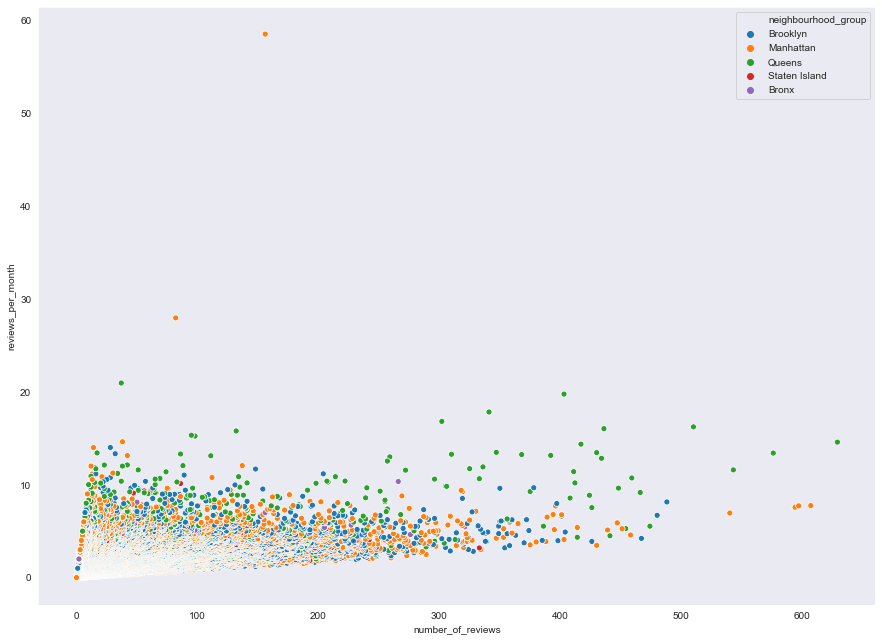

In [112]:
plt.figure(figsize = (15,11))
sns.scatterplot(data1.number_of_reviews,data1.reviews_per_month,hue=data1.neighbourhood_group)
plt.ioff()

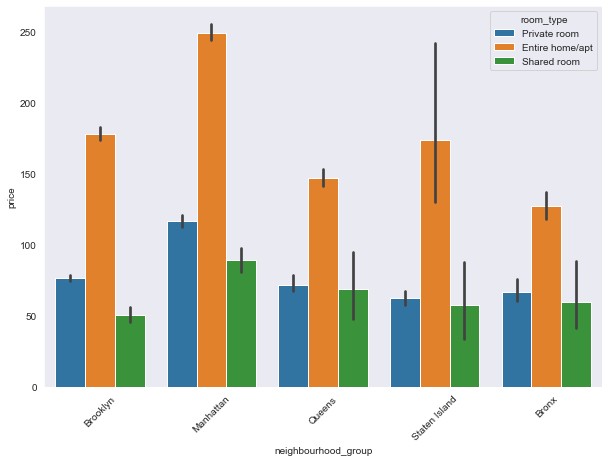

In [113]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = data1)
plt.xticks(rotation=45)
plt.show()

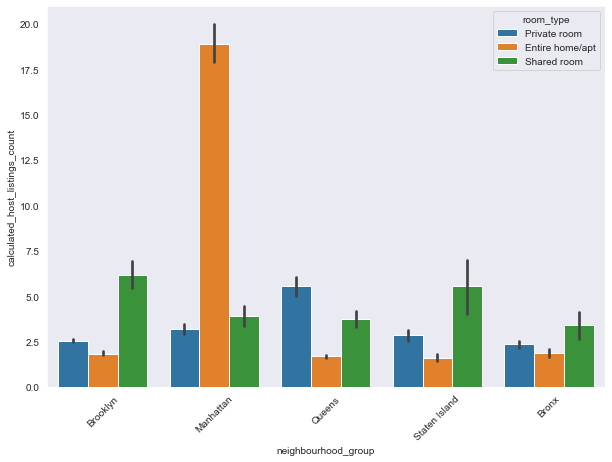

In [110]:
result = data1[["neighbourhood_group",'room_type',"calculated_host_listings_count"]].groupby(['neighbourhood_group'], as_index =False).count().sort_values(by= "calculated_host_listings_count",ascending = False)
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "calculated_host_listings_count", hue = "room_type", data = data1)
plt.xticks(rotation=45)
plt.show()

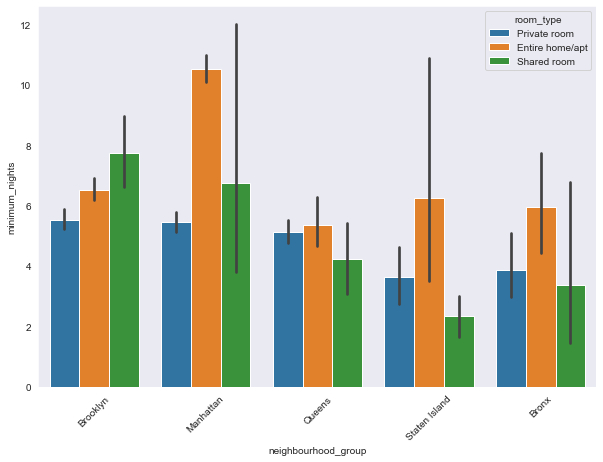

In [114]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "minimum_nights", hue = "room_type", data = data1)
plt.xticks(rotation=45)
plt.show()

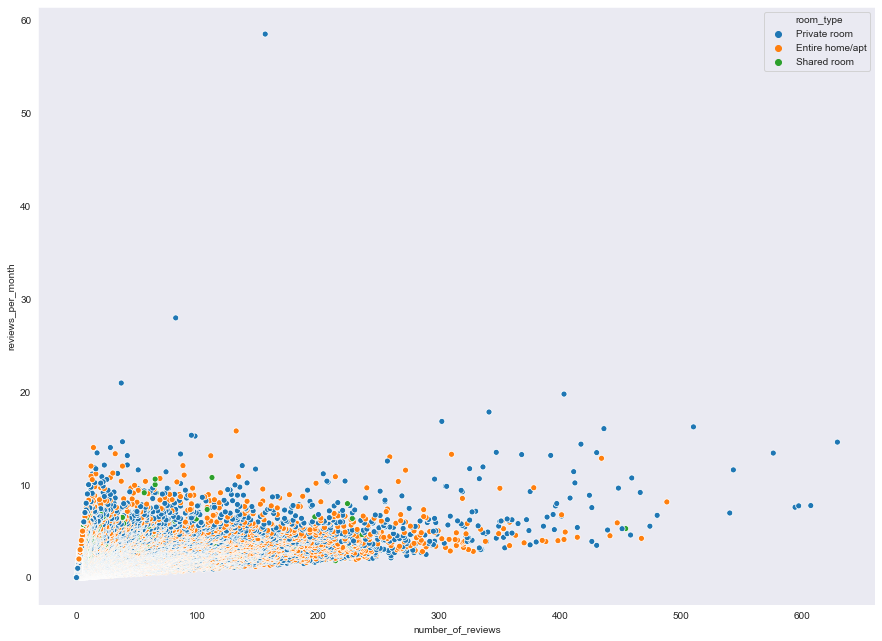

In [115]:
plt.figure(figsize = (15,11))
sns.scatterplot(data1.number_of_reviews,data1.reviews_per_month,hue=data1.room_type)
plt.ioff()

<Figure size 720x504 with 0 Axes>

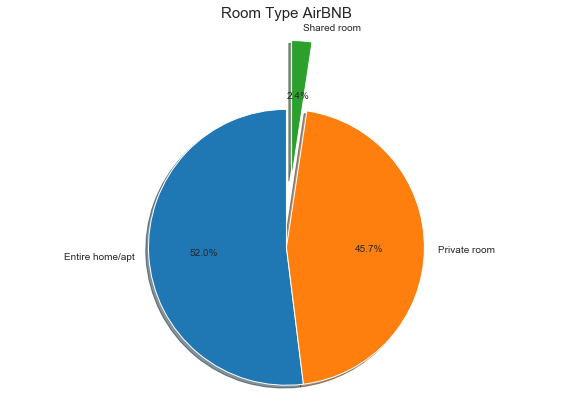

In [116]:
result = data1.groupby(["room_type"], as_index ="True").count().sort_values(by= "calculated_host_listings_count",ascending = False)
plt.figure(figsize=(10,7))
label = result.index
count = result.calculated_host_listings_count
explode = (0, 0, 0.5)
fig1, ax = plt.subplots(figsize=(10,7))
ax.pie(count ,labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90,explode = explode)
ax.set_title('Room Type AirBNB', fontsize = 15)

ax.axis('equal')

plt.show()

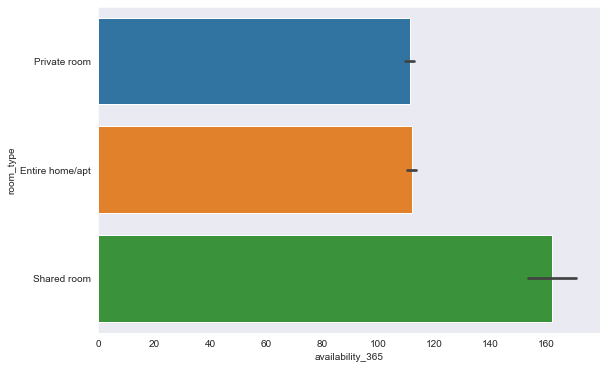

In [117]:
plt.figure(figsize=(9,6))
sns.barplot(x="availability_365", y="room_type", data=data1)
plt.show()

In [118]:
data1.tail()

neighbourhood_group       neighbourhood  latitude  longitude  \
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
48890                0.0                               2                 9  
48891                0.0                               2                36  
48892                0.0                               1                27  
48893                0.0                               6                 2  
48894                0.0                               1                23

In [119]:
neighbourhood_area= data[['neighbourhood','calculated_host_listings_count']].groupby(['neighbourhood'], as_index =False).count().sort_values(by= "calculated_host_listings_count",ascending = False)
neighbourhood_area_index = neighbourhood_area.head(20).set_index('neighbourhood')
neighbourhood_area_index

calculated_host_listings_count
neighbourhood                                     
Williamsburg                                  3920
Bedford-Stuyvesant                            3714
Harlem                                        2658
Bushwick                                      2465
Upper West Side                               1971
Hell's Kitchen                                1958
East Village                                  1853
Upper East Side                               1798
Crown Heights                                 1564
Midtown                                       1545
East Harlem                                   1117
Greenpoint                                    1115
Chelsea                                       1113
Lower East Side                                911
Astoria                                        900
Washington Heights                             899
West Village                                   768
Financial District                             744
Flatbush                                       621
Clinton Hill                                   572